importing necessary library

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [18]:
url = 'https://raw.githubusercontent.com/mdhasanali3/assignments/main/ml/assignment%202/data2.txt'
data = pd.read_csv(url, header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


visualizing dataset  with scatterplot

In [19]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
  
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='magenta', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

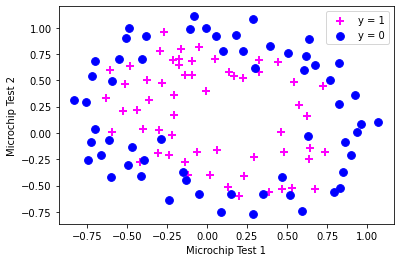

In [20]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [21]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values
print(X,5)


[[ 0.051267   0.69956  ]
 [-0.092742   0.68494  ]
 [-0.21371    0.69225  ]
 [-0.375      0.50219  ]
 [-0.51325    0.46564  ]
 [-0.52477    0.2098   ]
 [-0.39804    0.034357 ]
 [-0.30588   -0.19225  ]
 [ 0.016705  -0.40424  ]
 [ 0.13191   -0.51389  ]
 [ 0.38537   -0.56506  ]
 [ 0.52938   -0.5212   ]
 [ 0.63882   -0.24342  ]
 [ 0.73675   -0.18494  ]
 [ 0.54666    0.48757  ]
 [ 0.322      0.5826   ]
 [ 0.16647    0.53874  ]
 [-0.046659   0.81652  ]
 [-0.17339    0.69956  ]
 [-0.47869    0.63377  ]
 [-0.60541    0.59722  ]
 [-0.62846    0.33406  ]
 [-0.59389    0.005117 ]
 [-0.42108   -0.27266  ]
 [-0.11578   -0.39693  ]
 [ 0.20104   -0.60161  ]
 [ 0.46601   -0.53582  ]
 [ 0.67339   -0.53582  ]
 [-0.13882    0.54605  ]
 [-0.29435    0.77997  ]
 [-0.26555    0.96272  ]
 [-0.16187    0.8019   ]
 [-0.17339    0.64839  ]
 [-0.28283    0.47295  ]
 [-0.36348    0.31213  ]
 [-0.30012    0.027047 ]
 [-0.23675   -0.21418  ]
 [-0.06394   -0.18494  ]
 [ 0.062788  -0.16301  ]
 [ 0.22984   -0.41155  ]


In [22]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
      for j in range(0, i+1):
        term1 = x1col ** (i-j)
        term2 = x2col ** (j)
        term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
        out   = np.hstack(( out, term ))
        
    return out

In [23]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)
XX

(118, 2) (118, 66)


array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         1.50756332e-04,  2.05713421e-03,  2.80704704e-02],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         4.16651692e-04, -3.07715393e-03,  2.27261199e-02],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         2.40853745e-03, -7.80174092e-03,  2.52714199e-02],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.33324699e-01, -4.81276442e-01,  9.92723934e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         3.99160874e-05, -6.29489121e-03,  9.92723934e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.08646006e-13, -1.49344370e-14,  7.22631762e-16]])

In [24]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [25]:
#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    m = myy.size 
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )


In [26]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )        
    g = 1.0/(1.0+np.exp(-z))
    return g

In [27]:
def compute_gradient_logistic(X, y, w):
  m,n = X.shape
  dj_dw = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))             #(n,)(n,)=scalar
    err_i  = f_wb_i  - y[i]                       #scalar
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j]        #scalar
  dj_dw = dj_dw/m                                   #(n,)
      
  return dj_dw

In [28]:
import copy
import math
initial_theta = np.zeros(XX.shape[1])
print(initial_theta.shape)

# def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
#     result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
#     return np.array([result.x]), result.fun

def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.):
  m = myX.shape[0]
  J_history = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
    # Calculate the gradient and update the parameters
    dj_dw = compute_gradient_logistic(myX, myy, w)   

    # Update Parameters using w, b, alpha and gradient
    w = w*(1-alpha*(mylambda/m)) - alpha * dj_dw              
  
    # Save cost J at each iteration
    if i<100000:      # prevent resource exhaustion 
        J_history.append( computeCost(w, myX, myy, mylambda) )

    # Print cost every at intervals 10 times or as many iterations if < 10
    if i% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
  return w, min(J_history)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.3, 200)
print(theta.shape)
print(mincost)

(66,)
Iteration    0: Cost 0.6871405674573714   
Iteration   20: Cost 0.6290096169422484   
Iteration   40: Cost 0.5982388057071513   
Iteration   60: Cost 0.5753565450466624   
Iteration   80: Cost 0.5567735381552777   
Iteration  100: Cost 0.5410591277608442   
Iteration  120: Cost 0.5274726385652316   
Iteration  140: Cost 0.5155555713281706   
Iteration  160: Cost 0.5049908792927309   
Iteration  180: Cost 0.4955446152753888   
(66,)
0.4874426504697406


In [29]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    alpha = .1
    iters = 2000

    theta, mincost = optimizeRegularizedTheta(mytheta, myX, myy, alpha, iters, mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration    0: Cost 0.691100342525338   
Iteration  200: Cost 0.5695610710258278   
Iteration  400: Cost 0.5198661671992133   
Iteration  600: Cost 0.4873998933845835   
Iteration  800: Cost 0.4641208383686552   
Iteration 1000: Cost 0.4464778994426601   
Iteration 1200: Cost 0.4325811464975307   
Iteration 1400: Cost 0.421321011911372   
Iteration 1600: Cost 0.41199763185086646   
Iteration 1800: Cost 0.4041443548629274   
[ 1.80895028  1.19327051  1.93047321 -2.92202465 -1.66933109 -2.06360319
  0.51394875 -0.70855342 -0.68091121  0.01509431 -2.12281454 -0.12732639
 -1.05230795 -0.55090912 -1.61389196 -0.12886562 -0.38907477 -0.07844303
 -0.48856449 -0.58464505 -0.33588042 -1.49342345  0.02728522 -0.4956889
  0.00577684 -0.5553396  -0.3230264  -1.10265214 -0.37345863 -0.18666343
 -0.06592202 -0.2069313  -0.0652581  -0.29152601 -0.41465006 -0.37671752
 -1.08405078  0.04698325 -0.25974583  0.0157464  -0.22236584  0.01039536
 -0.31738897 -0.23082524 -0.76514157 -0.43891173 -0.09183981 

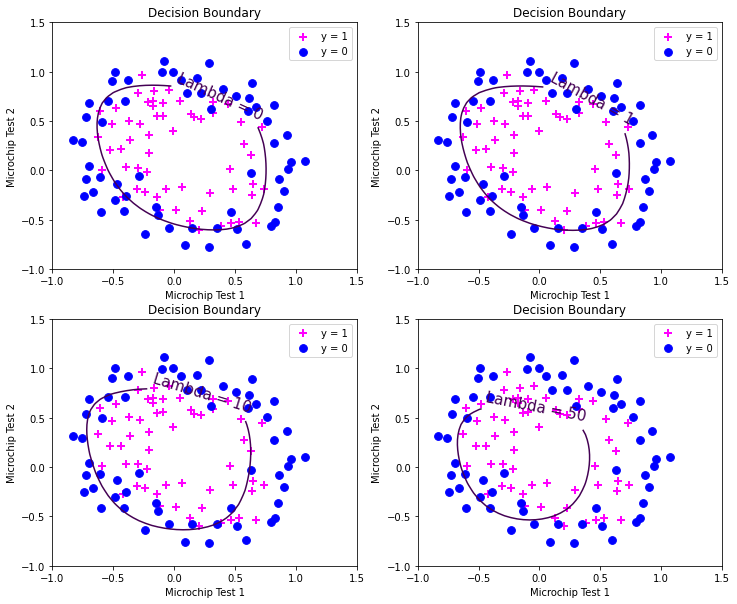

In [30]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)